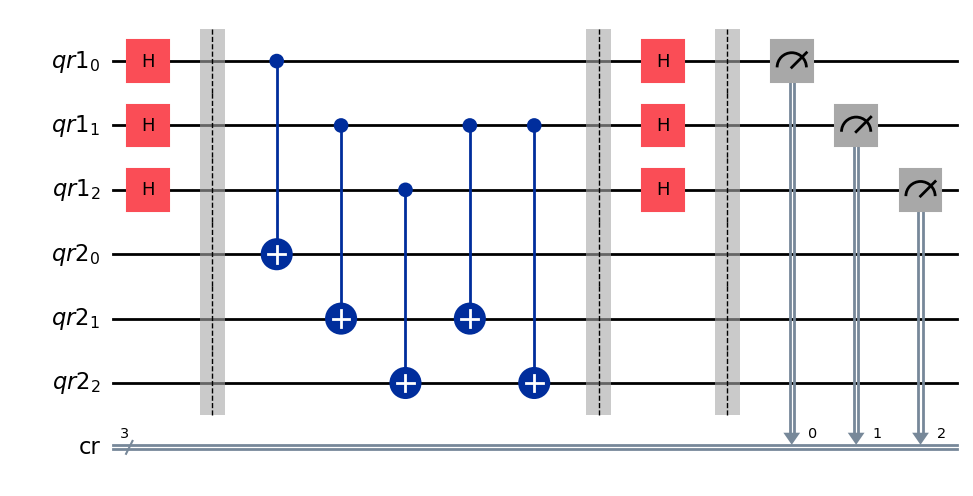

In [1]:
# example of running algorithm each time
# why do we construct the oracle like that
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

s = '110'

n = len(s)
qr1 = QuantumRegister(n, 'qr1')
qr2 = QuantumRegister(n, 'qr2')
cr = ClassicalRegister(n, 'cr')
qc = QuantumCircuit(qr1, qr2, cr)

# first round of hadamards
qc.h(qr1)
qc.barrier()

# oracle
qc.cx(qr1, qr2)
firstOne = -1
for i in range(n):
    if s[n - i - 1] == '1' and firstOne == -1:
        firstOne = i
    if s[n - i - 1] == '1':
        qc.cx(qr1[firstOne], qr2[i])
qc.barrier()

# second round of hadamards
qc.h(qr1)
qc.barrier()

# measurement
qc.measure(qr1, cr)

qc.draw('mpl')

In [7]:
#running the circuit
from qiskit_aer import QasmSimulator
from qiskit.compiler import assemble

sim = QasmSimulator()
job = assemble(qc, sim)
result = sim.run(job, shots = 1).result()
print(result.get_counts())

{'001': 1}


C:\Users\szaro\AppData\Local\Temp\ipykernel_56440\1300079943.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(job, shots = 1).result()
